In [2]:
import pandas as pd
import datetime


In [3]:
#to load the data back in use
df_full = pd.read_pickle('original_turnstile_df.pkl')

In [4]:
#create a new column with using the date & time columns,
# then turning it into a datetime object
df_full['DateTime'] = pd.to_datetime(df_full.DATE.astype(str) + " " + df_full.TIME.astype(str))

In [5]:
#remove whitespace from the column titles
df_full.columns = [column.strip() for column in df_full.columns]
df_full.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DateTime'],
      dtype='object')

In [6]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
turnstiles_df = df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'SCP', 'DATE', 'DateTime' ]).sum().reset_index()


In [7]:
turnstiles_df.head(1000)

,C/A,UNIT,STATION,LINENAME,SCP,DATE,DateTime,ENTRIES,EXITS
0,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 00:00:00,7450785,2533372
1,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 04:00:00,7450788,2533375
2,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 08:00:00,7450798,2533391
3,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 12:00:00,7450826,2533423
4,A002,R051,59 ST,NQR456W,02-00-00,08/29/2020,2020-08-29 16:00:00,7450910,2533454
...,...,...,...,...,...,...,...,...,...
995,A002,R051,59 ST,NQR456W,02-03-05,09/16/2020,2020-09-16 20:00:00,12005509,1445930
996,A002,R051,59 ST,NQR456W,02-03-05,09/17/2020,2020-09-17 00:00:00,12005628,1445931
997,A002,R051,59 ST,NQR456W,02-03-05,09/17/2020,2020-09-17 04:00:00,12005635,1445931
998,A002,R051,59 ST,NQR456W,02-03-05,09/17/2020,2020-09-17 08:00:00,12005677,1445966


In [8]:
#check for duplicated values
df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'SCP', 'DateTime' ])['ENTRIES'].count().reset_index().sort_values('ENTRIES', ascending = False).head(15)


,C/A,UNIT,STATION,LINENAME,SCP,DateTime,ENTRIES
610077,R627,R063,SUTTER AV-RUTLD,3,00-00-01,2020-09-07 16:00:00,2
499482,R245A,R051,59 ST,456NQRW,01-00-00,2020-09-12 00:00:00,2
320326,N532,R129,BERGEN ST,FG,00-00-01,2020-08-31 17:00:00,2
87,A002,R051,59 ST,NQR456W,02-00-00,2020-09-12 12:00:00,2
320201,N532,R129,BERGEN ST,FG,00-00-00,2020-08-31 17:00:00,2
609953,R627,R063,SUTTER AV-RUTLD,3,00-00-00,2020-09-08 00:00:00,2
610079,R627,R063,SUTTER AV-RUTLD,3,00-00-01,2020-09-08 00:00:00,2
609951,R627,R063,SUTTER AV-RUTLD,3,00-00-00,2020-09-07 16:00:00,2
499484,R245A,R051,59 ST,456NQRW,01-00-00,2020-09-12 08:00:00,2
499483,R245A,R051,59 ST,456NQRW,01-00-00,2020-09-12 04:00:00,2


Looks like 12 entries have duplicate data all coming from 3 stations, check a few of these out.

It seems like RECOVR AUD has weird values where there is duplicated data, so I will drop those values

Additionally, will check if there are weird values in other places there is a RECOVR AUD value

In [9]:
#RECOVR AUD rows have weird data so lets just drop them all

df_full = df_full[df_full.DESC=='REGULAR']

## find the daily entries

The turnstile counter does not reset each day, it just keeps increasing the count. In order to find the daliy entries, subtract the previous day from the current day.

In [10]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
stations_df = df_full.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'DATE']).sum().reset_index()


In [11]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,NQR456W,08/29/2020,353663977,198126524
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494


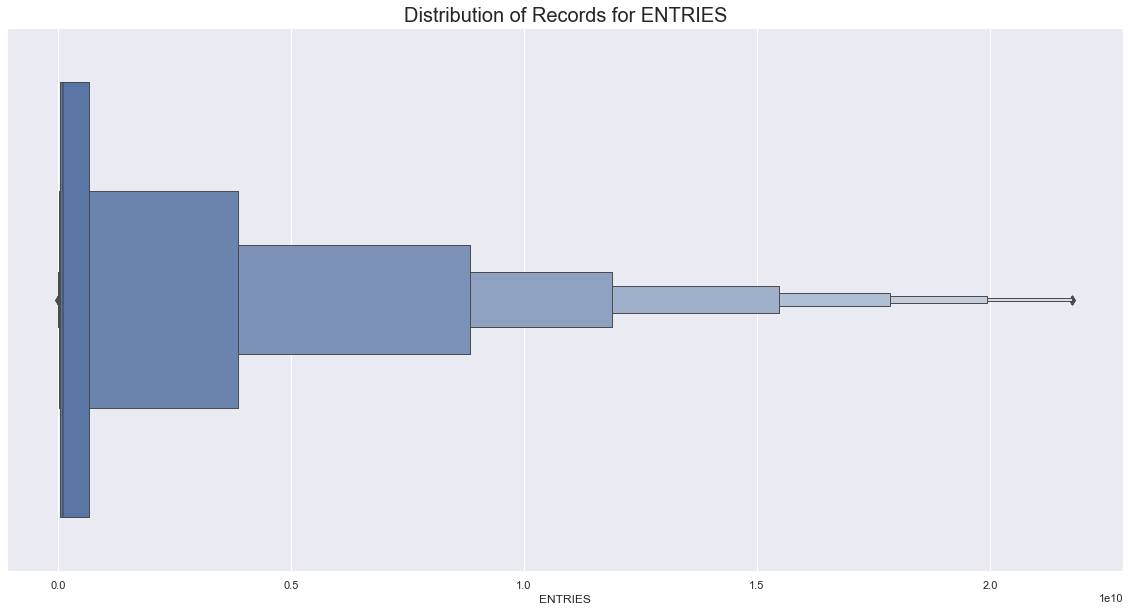

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot a distribution plot for the frequency of Exits records
plt.figure(figsize=(20,10))
#plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(x='ENTRIES', data=stations_df)
plt.title("Distribution of Records for ENTRIES", fontsize=20);

Drop outliers

In [13]:
#everything greater than 2.5mill
stations_df = stations_df[stations_df.ENTRIES<=27500000000]

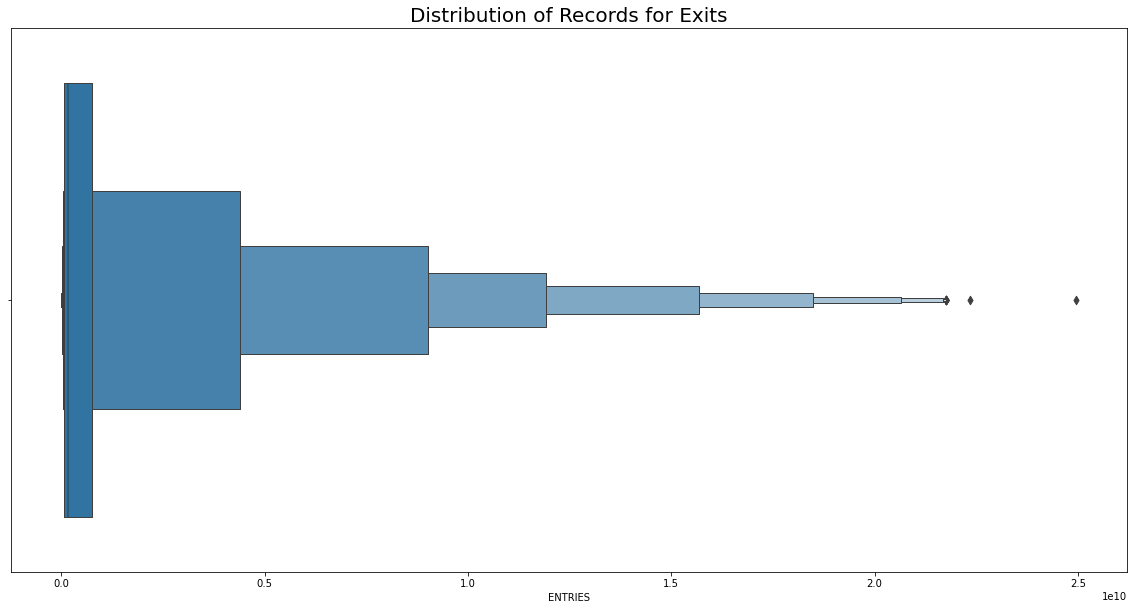

In [14]:
# plot a distribution plot for the frequency of Exits records
plt.figure(figsize=(20,10))
#plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(x='ENTRIES', data=stations_df)
plt.title("Distribution of Records for ENTRIES", fontsize=20);

In [15]:
#create two new columns that are the previous day with associated 
#number of entries
stations_df[['Previous_date', 'Previous_Entries']] = (stations_df.groupby(["C/A", "UNIT", "STATION", "LINENAME"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

<ipython-input-15-3c7abcf33e93>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stations_df[['Previous_date', 'Previous_Entries']] = (stations_df.groupby(["C/A", "UNIT", "STATION", "LINENAME"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [16]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
0,A002,R051,59 ST,NQR456W,08/29/2020,353663977,198126524,NaN,NaN
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110,08/29/2020,353663977.0
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360,08/30/2020,353674428.0
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598,08/31/2020,353686433.0
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494,09/01/2020,353707933.0


In [17]:
#drop the first row associated with each new station in order to 
# not combine data for different turnstiles
stations_df.dropna(subset = ['Previous_date'], axis = 0, inplace = True)

In [18]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110,08/29/2020,353663977.0
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360,08/30/2020,353674428.0
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598,08/31/2020,353686433.0
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494,09/01/2020,353707933.0
5,A002,R051,59 ST,NQR456W,09/03/2020,353753348,198204420,09/02/2020,353730492.0


In [19]:
#make sure that the count is actually increasing each day
# i.e., we should have count(yesterday) < count(today)
# but it looks like that's not the case
counter_mask = (stations_df['ENTRIES'] < stations_df['Previous_Entries'])
stations_df[counter_mask]

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries
59,A007,R079,5 AV/59 ST,NQRW,09/15/2020,753398109,34731169,09/14/2020,1.130088e+09
77,A010,R080,57 ST-7 AV,NQRW,09/12/2020,375562005,140323051,09/11/2020,3.975106e+08
111,A013,R081,49 ST,NQRW,09/04/2020,152602116,307887908,09/03/2020,1.780288e+08
150,A015,R081,49 ST,NQRW,09/01/2020,198702519,110010218,08/31/2020,2.117487e+08
232,A025,R023,34 ST-HERALD SQ,BDFMNQRW,08/30/2020,7909459657,11414629126,08/29/2020,7.910489e+09
...,...,...,...,...,...,...,...,...,...
15551,R727,R430,PELHAM PKWY,5,09/16/2020,2220940437,969075163,09/15/2020,2.658626e+09
15620,S101,R070,ST. GEORGE,1,09/01/2020,109305378,89976,08/31/2020,1.215648e+08
15631,S101,R070,ST. GEORGE,1,09/12/2020,101372921,79540,09/11/2020,1.216425e+08
15670,S102,R165,TOMPKINSVILLE,1,09/09/2020,7542070,209631,09/08/2020,1.508286e+07


In [20]:
#how many tursntiles have this issue?
stations_df[counter_mask].groupby(["C/A", "UNIT", "STATION", "LINENAME"]).size()


C/A    UNIT  STATION          LINENAME
A007   R079  5 AV/59 ST       NQRW        1
A010   R080  57 ST-7 AV       NQRW        1
A013   R081  49 ST            NQRW        1
A015   R081  49 ST            NQRW        1
A025   R023  34 ST-HERALD SQ  BDFMNQRW    4
                                         ..
R641   R210  BEVERLY RD       25          1
R727   R430  PELHAM PKWY      5           2
S101   R070  ST. GEORGE       1           2
S102   R165  TOMPKINSVILLE    1           1
TRAM1  R468  RIT-MANHATTAN    R           1
Length: 352, dtype: int64

Looks like 352 turnstiles have the reverse counter problem.

This just means that the difference will be negative. we can fix this by considering the absolute value

# Questions

notice that the last few rows had the same values for entries and previous entries

also, our max had only 24 entries the first day and ~900,000 the next.

### How to deal with this type of inconsistent data?

- choose some min and max difference threshold to place on day to day differences?

- put an upper limit that we say is an unreasonable amount?

- lower limit?

In [21]:
#try vinny's method of resetting the counter manually if it is too 
# high

def daily_count2(row, max_count):
    count = row['ENTRIES'] - row['Previous_Entries']
    
    if count < 0:
        count *= -1
        
    if count > max_count:
        print(row["ENTRIES"], row["Previous_Entries"])
        count = min(row["ENTRIES"], row["Previous_Entries"])
        
    if count > max_count:
        return 0
    return count

stations_df['Daily_Entries'] = stations_df.apply(daily_count2, axis=1, max_count=10000)


353674428 353663977.0
353686433 353674428.0
353707933 353686433.0
353730492 353707933.0
353753348 353730492.0
353776187 353753348.0
353797210 353776187.0
353811522 353797210.0
353823279 353811522.0
353838817 353823279.0
353862769 353838817.0
353887500 353862769.0
353910700 353887500.0
353986703 353910700.0
354110828 353986703.0
354126794 354110828.0
354152770 354126794.0
354180677 354152770.0
354209174 354180677.0
354236735 354209174.0
126862726 126851096.0
126879547 126862726.0
126896375 126879547.0
126912882 126896375.0
126929501 126912882.0
126944247 126929501.0
126955642 126944247.0
126977962 126965334.0
126995545 126977962.0
127013057 126995545.0
127029837 127013057.0
127045293 127029837.0
127056093 127045293.0
127067034 127056093.0
127084898 127067034.0
127103620 127084898.0
127122362 127103620.0
127140970 127122362.0
1130088150 753388160.0
753398109 1130088150.0
397247804 397234600.0
397263905 397247804.0
397287199 397263905.0
397311973 397287199.0
397337144 397311973.0
39736170

53794533 55889149.0
55910155 53794533.0
55936859 55924837.0
55948905 55936859.0
55960833 55948905.0
55972771 55960833.0
79801220 79790843.0
79848081 79837234.0
79859148 79848081.0
79870275 79859148.0
79901075 79890181.0
79912034 79901075.0
79923353 79912034.0
79934620 79923353.0
169552316 169541412.0
169563857 169552316.0
169575558 169563857.0
169587451 169575558.0
169634890 169622356.0
169647186 169634890.0
169659505 169647186.0
169669920 169659505.0
169688128 169677941.0
169700401 169688128.0
169712990 169700401.0
169725664 169712990.0
169738311 169725664.0
599058921 599046856.0
599071324 599058921.0
599084470 599071324.0
599097934 599084470.0
599108534 599097934.0
599135299 599124137.0
599148988 599135299.0
599162559 599148988.0
599176008 599162559.0
599186961 599176008.0
599206919 599195430.0
599221366 599206919.0
599236218 599221366.0
599250800 599236218.0
599265243 599250800.0
138128947 138118554.0
138142596 138128947.0
138156752 138142596.0
138171271 138156752.0
138185123 138171

149120577 149107618.0
149133204 149120577.0
149145971 149133204.0
2894979156 2894952746.0
2895009551 2894979156.0
2895048746 2895009551.0
2895089807 2895048746.0
2895131197 2895089807.0
2895173899 2895131197.0
2892455236 2895173899.0
2895246944 2892455236.0
2895273072 2895246944.0
2895304851 2895273072.0
2895346681 2895304851.0
2895389603 2895346681.0
2895431172 2895389603.0
2895473351 2895431172.0
2895504593 2895473351.0
2895535780 2895504593.0
2895579165 2895535780.0
2895624501 2895579165.0
2895668590 2895624501.0
2895714414 2895668590.0
1219036637 187533606.0
187546655 1219036637.0
66876754 66866557.0
66886809 66876754.0
55766221 66908601.0
66929463 55766221.0
66939953 66929463.0
44637912 66953648.0
66981557 44647772.0
55827227 66981557.0
67004566 55827227.0
83955169 125929922.0
125949334 83961890.0
156606715 156591992.0
156621613 156606715.0
156637246 156621613.0
156653467 156637246.0
130555972 156653467.0
156673686 130555972.0
130590235 156690680.0
156724673 130590235.0
156741551 

164331863 164314465.0
164344843 164331863.0
164356517 164344843.0
164372895 164356517.0
164393259 164372895.0
164412853 164393259.0
164432349 164412853.0
164449986 164432349.0
164462684 164449986.0
164477827 164462684.0
164498236 164477827.0
164519333 164498236.0
164540193 164519333.0
164561341 164540193.0
2150606923 2155224496.0
2142051166 2150606923.0
2142078330 2142068140.0
2142088522 2142078330.0
49280058 49269786.0
49332138 49321553.0
49342689 49332138.0
49353238 49342689.0
49363397 49353238.0
104076171 104064806.0
104087557 104076171.0
104099243 104087557.0
104110845 104099243.0
104155649 104143326.0
104167770 104155649.0
104179313 104167770.0
104216857 104204791.0
104229268 104216857.0
104241502 104229268.0
104253222 104241502.0
2890941400 2890931268.0
2890951665 2890941400.0
2890961971 2890951665.0
2891003256 2890993221.0
2891013786 2891003256.0
2891024478 2891013786.0
70056620 84060657.0
84074786 70056620.0
70085843 84099118.0
84110157 70085843.0
70104482 84117640.0
84131178 7

116931760 116918404.0
116945337 116931760.0
116958971 116945337.0
116972429 116958971.0
176874840 176863950.0
176888979 176874840.0
176902927 176888979.0
176917223 176902927.0
176932462 176917223.0
176946551 176932462.0
176956565 176946551.0
176977234 176966102.0
176992537 176977234.0
177008279 176992537.0
177023882 177008279.0
177039367 177023882.0
177049892 177039367.0
177059994 177049892.0
177074768 177059994.0
177089825 177074768.0
177105145 177089825.0
177120776 177105145.0
25845786 38767049.0
45232757 25845786.0
38773327 45232757.0
33055781 38792002.0
38797875 33055781.0
85326035 127985210.0
127993911 85326035.0
106708697 128043165.0
128056951 106708697.0
886051 1501566.0
750784 886051.0
1519865 757715.0
1417999 1551624.0
1563707 1417999.0
15120703936 15692891778.0
13202866805 15120703936.0
15660960924 13202866805.0
217729946 217719631.0
217740401 217729946.0
217750820 217740401.0
212602223 217778898.0
217801902 212602223.0
211950320 217801902.0
214603227 211950320.0
208170063 21

10512299867 10512269242.0
10512345913 10512299867.0
10512395464 10512345913.0
10512445320 10512395464.0
10512493317 10512445320.0
10512532280 10512493317.0
10512560894 10512532280.0
10512603113 10512560894.0
10512654159 10512603113.0
10512704758 10512654159.0
10512755441 10512704758.0
10513722118 10512755441.0
78995154 94790347.0
94798266 78995154.0
166186094 166175357.0
166197441 166186094.0
166213325 166197441.0
138524864 166213325.0
166245703 138524864.0
166262991 166245703.0
166280305 166262991.0
166294597 166280305.0
166307042 166294597.0
166322164 166307042.0
166338773 166322164.0
166355490 166338773.0
166371534 166355490.0
166389029 166371534.0
166403711 166389029.0
166416466 166403711.0
166433402 166416466.0
166451182 166433402.0
166468804 166451182.0
166487127 166468804.0
6711780276 8054128500.0
8054144072 6711780276.0
8043122615 8054192568.0
8054202340 8043122615.0
10406970791 10406954233.0
10406987873 10406970791.0
10407005056 10406987873.0
10407021607 10407005056.0
86725289

141263975 164792345.0
141278808 141263975.0
141293664 141278808.0
141308294 141293664.0
141319750 141308294.0
94234583 141336973.0
70679612 94234583.0
117817033 70679612.0
141389574 117817033.0
188535580 141395167.0
141417896 188535580.0
141433595 141417896.0
141449594 141433595.0
141465490 141449594.0
360328644 426470889.0
426485848 360328644.0
196601808 196583543.0
196620756 196601808.0
196640269 196620756.0
196659472 196640269.0
196677359 196659472.0
196689881 196677359.0
196712787 196699691.0
196733760 196712787.0
196754803 196733760.0
196775283 196754803.0
196794581 196775283.0
196807587 196794581.0
196820550 196807587.0
196841671 196820550.0
196863515 196841671.0
196885475 196863515.0
196907100 196885475.0
355198201 355187726.0
355208688 355198201.0
355219050 355208688.0
6521233768 6521221222.0
6521246996 6521233768.0
6521260297 6521246996.0
6521273777 6521260297.0
6521286634 6521273777.0
6521314991 6521304839.0
6521328418 6521314991.0
6521342538 6521328418.0
6521355989 652134253

1559469114 1559433904.0
1559504011 1559469114.0
1559532242 1559504011.0
1559552370 1559532242.0
1559580731 1559552370.0
1559617972 1559580731.0
1559654829 1559617972.0
1559691364 1559654829.0
1559142305 1559691364.0
125308233 150362900.0
150379862 125308233.0
150392533 150379862.0
150404479 150392533.0
150417071 150404479.0
150429816 150417071.0
150441349 150429816.0
150469225 150457272.0
150484579 150469225.0
150499939 150484579.0
150515596 150499939.0
150528751 150515596.0
150549866 150538050.0
150566003 150549866.0
150582735 150566003.0
150598620 150582735.0
150614891 150598620.0
14112455 15602665.0
15611367 14112455.0
114988199 114976306.0
115000603 114988199.0
115013853 115000603.0
115027429 115013853.0
115041443 115027429.0
115056533 115041443.0
115070230 115056533.0
115085416 115070230.0
115099769 115085416.0
115113902 115099769.0
115126999 115113902.0
115139980 115126999.0
115172382 115157202.0
115187813 115172382.0
115203445 115187813.0
115218926 115203445.0
44963364 53948368.

In [22]:
stations_df.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries
1,A002,R051,59 ST,NQR456W,08/30/2020,353674428,198135110,08/29/2020,353663977.0,0.0
2,A002,R051,59 ST,NQR456W,08/31/2020,353686433,198148360,08/30/2020,353674428.0,0.0
3,A002,R051,59 ST,NQR456W,09/01/2020,353707933,198166598,08/31/2020,353686433.0,0.0
4,A002,R051,59 ST,NQR456W,09/02/2020,353730492,198185494,09/01/2020,353707933.0,0.0
5,A002,R051,59 ST,NQR456W,09/03/2020,353753348,198204420,09/02/2020,353730492.0,0.0


In [23]:
stations_df.nlargest(10, 'Daily_Entries')

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries
2405,E013,R373,20 AV,D,09/14/2020,56959985,32353862,09/13/2020,56949986.0,9999.0
13420,R329,R362,ALLERTON AV,25,09/05/2020,136907708,13604945,09/04/2020,136897709.0,9999.0
8237,N525,R142,DELANCEY/ESSEX,FJMZ,08/31/2020,169984384,146113714,08/30/2020,169974386.0,9998.0
3578,J031,R006,WOODHAVEN BLVD,JZ,09/11/2020,72565561,63024911,09/10/2020,72555564.0,9997.0
8223,N523,R300,2 AV,F,09/07/2020,284659598,322297317,09/06/2020,284649601.0,9997.0
4421,N043,R186,86 ST,BC,09/14/2020,156775266,76273368,09/13/2020,156765272.0,9994.0
14303,R514,R094,ASTORIA BLVD,NQW,09/06/2020,402622145,4097724567,09/05/2020,402612151.0,9994.0
2288,E004,R234,50 ST,D,09/02/2020,79790843,76958265,09/01/2020,79780850.0,9993.0
11911,R231A,R176,33 ST,6,09/02/2020,97652997,54688541,09/01/2020,97643004.0,9993.0
12809,R291,R183,BEDFORD PK BLVD,4,09/03/2020,21005606,9605214,09/02/2020,20995614.0,9992.0


In [24]:
#drop the zero daily entres
stations_df = stations_df[stations_df.Daily_Entries !=0]

In [25]:
#add the combination of station and line name
stations_df['STATION_LINE'] = stations_df['STATION'] + ' ' + stations_df['LINENAME']
stations_df

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE
22,A006,R079,5 AV/59 ST,NQRW,08/30/2020,126851096,178578594,08/29/2020,126843178.0,7918.0,5 AV/59 ST NQRW
30,A006,R079,5 AV/59 ST,NQRW,09/07/2020,126965334,178681917,09/06/2020,126955642.0,9692.0,5 AV/59 ST NQRW
43,A007,R079,5 AV/59 ST,NQRW,08/30/2020,753319756,34654540,08/29/2020,753316532.0,3224.0,5 AV/59 ST NQRW
44,A007,R079,5 AV/59 ST,NQRW,08/31/2020,753324590,34659634,08/30/2020,753319756.0,4834.0,5 AV/59 ST NQRW
45,A007,R079,5 AV/59 ST,NQRW,09/01/2020,753330033,34664028,08/31/2020,753324590.0,5443.0,5 AV/59 ST NQRW
...,...,...,...,...,...,...,...,...,...,...,...
15717,TRAM2,R469,RIT-ROOSEVELT,R,09/14/2020,48587122,2932471,09/13/2020,48577625.0,9497.0,RIT-ROOSEVELT R
15718,TRAM2,R469,RIT-ROOSEVELT,R,09/15/2020,48595031,2932702,09/14/2020,48587122.0,7909.0,RIT-ROOSEVELT R
15719,TRAM2,R469,RIT-ROOSEVELT,R,09/16/2020,48602940,2932986,09/15/2020,48595031.0,7909.0,RIT-ROOSEVELT R
15720,TRAM2,R469,RIT-ROOSEVELT,R,09/17/2020,48610738,2933209,09/16/2020,48602940.0,7798.0,RIT-ROOSEVELT R


In [26]:
stations_df.describe()

,ENTRIES,EXITS,Previous_Entries,Daily_Entries
count,8.102000e+03,8.102000e+03,8.102000e+03,8102.000000
mean,1.437794e+09,1.142572e+09,1.437789e+09,5094.578005
std,3.410769e+09,3.111816e+09,3.410769e+09,2666.292806
min,8.620000e+03,2.284300e+04,8.592000e+03,1.000000
25%,4.712075e+07,2.830340e+07,4.711577e+07,2893.500000
50%,9.902413e+07,7.156157e+07,9.901675e+07,5142.000000
75%,6.673284e+08,1.766392e+08,6.673214e+08,7253.750000
max,2.177012e+10,2.782090e+10,2.177011e+10,9999.000000


## Some vis

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Entries', ylabel='Density'>

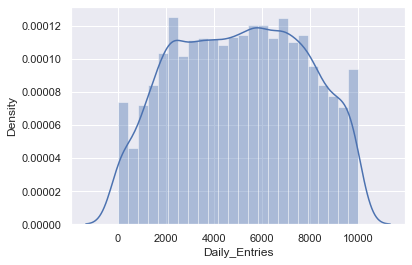

In [28]:
sns.distplot(stations_df['Daily_Entries']
             [stations_df['Daily_Entries'] < 50000])

investigate stations that have the same name but different locations

In [29]:
stations_daily = (stations_df.groupby(['STATION', 'LINENAME', 'DATE'])['Daily_Entries'].sum().reset_index())

stations_daily.head(10)

,STATION,LINENAME,DATE,Daily_Entries
0,1 AV,L,08/30/2020,7808.0
1,1 AV,L,08/31/2020,13014.0
2,1 AV,L,09/01/2020,6215.0
3,1 AV,L,09/02/2020,6635.0
4,1 AV,L,09/03/2020,6729.0
5,1 AV,L,09/04/2020,7043.0
6,1 AV,L,09/05/2020,5960.0
7,1 AV,L,09/06/2020,11913.0
8,1 AV,L,09/07/2020,9364.0
9,1 AV,L,09/08/2020,12271.0


In [30]:
stations_daily['STATION_LINE'] = stations_daily['STATION'] + ' ' + stations_daily['LINENAME']
stations_daily

,STATION,LINENAME,DATE,Daily_Entries,STATION_LINE
0,1 AV,L,08/30/2020,7808.0,1 AV L
1,1 AV,L,08/31/2020,13014.0,1 AV L
2,1 AV,L,09/01/2020,6215.0,1 AV L
3,1 AV,L,09/02/2020,6635.0,1 AV L
4,1 AV,L,09/03/2020,6729.0,1 AV L
...,...,...,...,...,...
5788,ZEREGA AV,6,09/14/2020,4642.0,ZEREGA AV 6
5789,ZEREGA AV,6,09/15/2020,6416.0,ZEREGA AV 6
5790,ZEREGA AV,6,09/16/2020,6404.0,ZEREGA AV 6
5791,ZEREGA AV,6,09/17/2020,6260.0,ZEREGA AV 6


In [31]:
top10_stations = \
    (stations_daily.groupby(['STATION_LINE'])['Daily_Entries'].sum()
                   .reset_index()
                   .sort_values(by='Daily_Entries',ascending=False) 
                   .STATION_LINE.head(10))
top10_stations.head(10)

84     34 ST-PENN STA ACE
269    FULTON ST 2345ACJZ
22           14 ST FLM123
78                33 ST 6
96             49 ST NQRW
234      CORTLANDT ST RNW
308     KINGSBRIDGE RD BD
404      VERNON-JACKSON 7
408            WALL ST 23
94               46 ST MR
Name: STATION_LINE, dtype: object

In [32]:
stations_daily_top10 = stations_df[stations_df['STATION_LINE'].isin(top10_stations)]
stations_daily_top10

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE
106,A013,R081,49 ST,NQRW,08/30/2020,152575761,307855750,08/29/2020,152572931.0,2830.0,49 ST NQRW
107,A013,R081,49 ST,NQRW,08/31/2020,152578932,307861117,08/30/2020,152575761.0,3171.0,49 ST NQRW
108,A013,R081,49 ST,NQRW,09/01/2020,152584490,307867719,08/31/2020,152578932.0,5558.0,49 ST NQRW
109,A013,R081,49 ST,NQRW,09/02/2020,152590227,307874563,09/01/2020,152584490.0,5737.0,49 ST NQRW
112,A013,R081,49 ST,NQRW,09/05/2020,152607649,307894332,09/04/2020,152602116.0,5533.0,49 ST NQRW
...,...,...,...,...,...,...,...,...,...,...,...
14143,R506,R276,VERNON-JACKSON,7,09/14/2020,44280125,903021,09/13/2020,44277229.0,2896.0,VERNON-JACKSON 7
14144,R506,R276,VERNON-JACKSON,7,09/15/2020,44284620,903670,09/14/2020,44280125.0,4495.0,VERNON-JACKSON 7
14145,R506,R276,VERNON-JACKSON,7,09/16/2020,44289536,904299,09/15/2020,44284620.0,4916.0,VERNON-JACKSON 7
14146,R506,R276,VERNON-JACKSON,7,09/17/2020,44294522,904956,09/16/2020,44289536.0,4986.0,VERNON-JACKSON 7


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily_Entries', ylabel='STATION_LINE'>

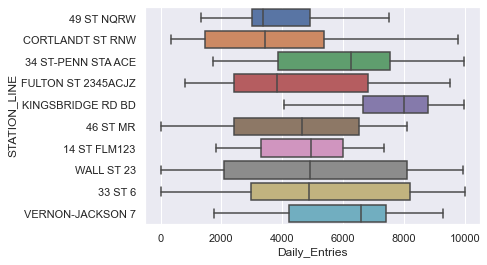

In [33]:
sns.boxplot('Daily_Entries', 'STATION_LINE',data=stations_daily_top10)

get top 25 stations

In [34]:
top25_stations = \
    (stations_daily.groupby(['STATION_LINE'])['Daily_Entries'].sum()
                   .reset_index()
                   .sort_values(by='Daily_Entries',ascending=False) 
                   .STATION_LINE.head(25))
top25_stations

84     34 ST-PENN STA ACE
269    FULTON ST 2345ACJZ
22           14 ST FLM123
78                33 ST 6
96             49 ST NQRW
234      CORTLANDT ST RNW
308     KINGSBRIDGE RD BD
404      VERNON-JACKSON 7
408            WALL ST 23
94               46 ST MR
64                23 ST 6
104               51 ST 6
13              125 ST 23
138               86 ST 1
50               181 ST A
41              170 ST BD
115       66 ST-LINCOLN 1
286          HOUSTON ST 1
268     FT HAMILTON PKY N
43         174-175 STS BD
185     BEDFORD-NOSTRAN G
333     MYRTLE-WILLOUGH G
376       ROCKAWAY BLVD A
74              28 ST NRW
216     CATHEDRAL PKWY BC
Name: STATION_LINE, dtype: object

In [35]:
stations_daily_top25 = stations_df[stations_df['STATION_LINE'].isin(top25_stations)]


In [71]:
stations_daily_top25.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE
106,A013,R081,49 ST,NQRW,08/30/2020,152575761,307855750,08/29/2020,152572931.0,2830.0,49 ST NQRW
107,A013,R081,49 ST,NQRW,08/31/2020,152578932,307861117,08/30/2020,152575761.0,3171.0,49 ST NQRW
108,A013,R081,49 ST,NQRW,09/01/2020,152584490,307867719,08/31/2020,152578932.0,5558.0,49 ST NQRW
109,A013,R081,49 ST,NQRW,09/02/2020,152590227,307874563,09/01/2020,152584490.0,5737.0,49 ST NQRW
112,A013,R081,49 ST,NQRW,09/05/2020,152607649,307894332,09/04/2020,152602116.0,5533.0,49 ST NQRW


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily_Entries', ylabel='STATION_LINE'>

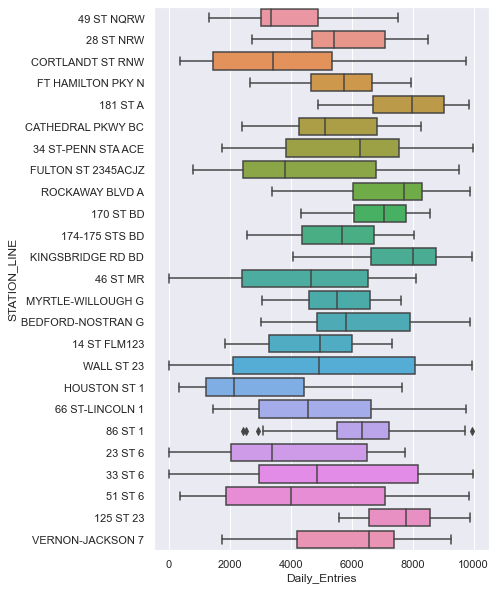

In [46]:
plt.figure(figsize = (6, 10))
sns.boxplot('Daily_Entries', 'STATION_LINE', data=stations_daily_top25)

checking the values to make sure we don't have anything crazy

In [57]:
stations_daily[stations_daily["STATION"] == "TIMES SQ-42 ST"].max()

STATION                       TIMES SQ-42 ST
LINENAME                        ACENQRS1237W
DATE                              09/14/2020
Daily_Entries                          17464
STATION_LINE     TIMES SQ-42 ST ACENQRS1237W
dtype: object

In [63]:
stations_daily[stations_daily["STATION_LINE"] == "34 ST-PENN STA ACE"].max()


STATION              34 ST-PENN STA
LINENAME                        ACE
DATE                     09/18/2020
Daily_Entries                 40040
STATION_LINE     34 ST-PENN STA ACE
dtype: object

In [66]:
entries_mask = (stations_daily['Daily_Entries'] > 10000)
stations_daily[entries_mask]

,STATION,LINENAME,DATE,Daily_Entries,STATION_LINE
1,1 AV,L,08/31/2020,13014.0,1 AV L
7,1 AV,L,09/06/2020,11913.0,1 AV L
9,1 AV,L,09/08/2020,12271.0,1 AV L
14,1 AV,L,09/13/2020,13184.0,1 AV L
15,1 AV,L,09/14/2020,12750.0,1 AV L
...,...,...,...,...,...
5764,WTC-CORTLANDT,1,09/10/2020,10424.0,WTC-CORTLANDT 1
5769,WTC-CORTLANDT,1,09/15/2020,10661.0,WTC-CORTLANDT 1
5770,WTC-CORTLANDT,1,09/16/2020,10781.0,WTC-CORTLANDT 1
5771,WTC-CORTLANDT,1,09/17/2020,10624.0,WTC-CORTLANDT 1


## try to split by weekend and weekday traffic

In [72]:
#import time

In [73]:
stations_daily_top25_copy = stations_daily_top25.copy()

In [77]:
#make a new column thats a date time object to put day of the week
stations_daily_top25_copy['Dateobject'] = pd.to_datetime(stations_daily_top25_copy['DATE'], format='%m/%d/%Y')

In [79]:
stations_daily_top25_copy['Day_of_Week'] = stations_daily_top25_copy['Dateobject'].dt.dayofweek

In [80]:
stations_daily_top25_copy

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE,Dateobject,Day_of_Week
106,A013,R081,49 ST,NQRW,08/30/2020,152575761,307855750,08/29/2020,152572931.0,2830.0,49 ST NQRW,2020-08-30,6
107,A013,R081,49 ST,NQRW,08/31/2020,152578932,307861117,08/30/2020,152575761.0,3171.0,49 ST NQRW,2020-08-31,0
108,A013,R081,49 ST,NQRW,09/01/2020,152584490,307867719,08/31/2020,152578932.0,5558.0,49 ST NQRW,2020-09-01,1
109,A013,R081,49 ST,NQRW,09/02/2020,152590227,307874563,09/01/2020,152584490.0,5737.0,49 ST NQRW,2020-09-02,2
112,A013,R081,49 ST,NQRW,09/05/2020,152607649,307894332,09/04/2020,152602116.0,5533.0,49 ST NQRW,2020-09-05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14143,R506,R276,VERNON-JACKSON,7,09/14/2020,44280125,903021,09/13/2020,44277229.0,2896.0,VERNON-JACKSON 7,2020-09-14,0
14144,R506,R276,VERNON-JACKSON,7,09/15/2020,44284620,903670,09/14/2020,44280125.0,4495.0,VERNON-JACKSON 7,2020-09-15,1
14145,R506,R276,VERNON-JACKSON,7,09/16/2020,44289536,904299,09/15/2020,44284620.0,4916.0,VERNON-JACKSON 7,2020-09-16,2
14146,R506,R276,VERNON-JACKSON,7,09/17/2020,44294522,904956,09/16/2020,44289536.0,4986.0,VERNON-JACKSON 7,2020-09-17,3


In [84]:
weekdays_mask = (stations_daily_top25_copy['Day_of_Week'].isin([0,1,2,3,4]))

In [89]:
weekday_df = stations_daily_top25_copy[weekdays_mask]

In [87]:
weekend_mask = (stations_daily_top25_copy['Day_of_Week'].isin([5,6]))

In [90]:
weekend_df = stations_daily_top25_copy[weekend_mask]

In [110]:
weekday_graph_data = weekday_df.groupby('STATION_LINE')[['Daily_Entries']].sum().sort_values(['Daily_Entries'], ascending = True)
weekend_graph_data = weekend_df.groupby('STATION_LINE')[['Daily_Entries']].sum().sort_values(['Daily_Entries'], ascending = True)


In [111]:
weekday_graph_data

,Daily_Entries
STATION_LINE,
ROCKAWAY BLVD A,161678.0
BEDFORD-NOSTRAN G,162777.0
86 ST 1,166997.0
28 ST NRW,167633.0
181 ST A,172782.0
CATHEDRAL PKWY BC,173222.0
MYRTLE-WILLOUGH G,174390.0
66 ST-LINCOLN 1,176245.0
174-175 STS BD,177984.0


In [112]:
weekdayx = list(weekday_graph_data.index)
weekdayy = list(weekday_graph_data['Daily_Entries'])
weekendx = list(weekend_graph_data.index)
weekendy = list(weekend_graph_data['Daily_Entries'])

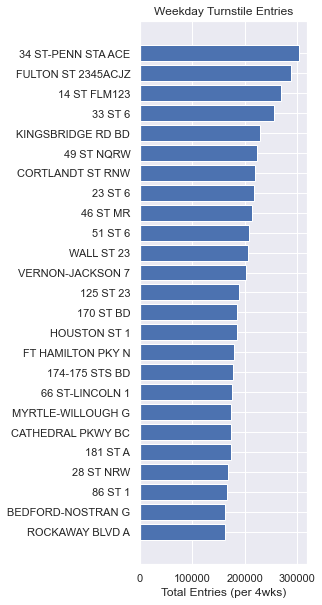

In [117]:
plt.figure(figsize=(3,10))
plt.xlabel('Total Entries (per 4wks)')
plt.title('Weekday Turnstile Entries')
plt.barh(weekdayx,weekdayy)
plt.savefig('weekday_plot.png', dpi=300, bbox_inches='tight');

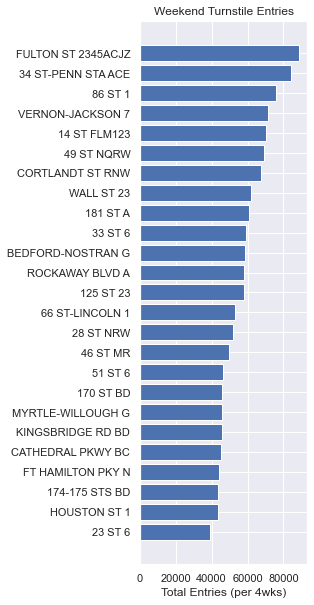

In [119]:
plt.figure(figsize=(3,10))
plt.xlabel('Total Entries (per 4wks)')
plt.title('Weekend Turnstile Entries')
plt.barh(weekendx,weekendy)
plt.savefig('weekend_plot.png', dpi=300, bbox_inches='tight');